# Chapter 4: Roots of (non-linear) Equations

## 1. Introduction

Goal of this chapter:

**Find the solutions of f(x)=0, where the function f is given.**

The solutions of this equation are called the *roots* of the equation or the *zeroes* of the function f.

The function $f$ might be defined as:
1. A mathematical statement, for instance: f(x) = log(x)
2. A computer algorithm.

$f$ might have:
1. A single zero, for instance: f(x) = log(x)
2. Multiple zeroes: f(x) = $x^2$
3. An infinite number of zeroes: f(x) = cos(x)
4. No zero: f(x) = cos(x) + 2

We focus only on *real* zeroes.

The methods presented in this chapter:
* Are meant to find *a single* root.
* Are iterative: they start from an estimate of the root and refine it.
* Usually require prior *bracketing* of the root: determine its lower and upper bounds.
* Assume that $f$ is *continuous* in the bracket.

Extensions can be derived to lift some of these conditions.

In [1]:
# Enlarge the plot size, everywhere in the notebook
def set_size(preset='screen'):
    import matplotlib
    if preset == 'screen':
        matplotlib.rcParams['figure.figsize'] = (7, 4)
        matplotlib.rcParams['axes.titlesize'] = 10
        matplotlib.rcParams['axes.labelsize'] = 10
    if preset == 'presentation':
        matplotlib.rcParams['figure.figsize'] = (14, 8)
        matplotlib.rcParams['axes.titlesize'] = 30
        matplotlib.rcParams['axes.labelsize'] = 30

set_size('presentation')

### Illustration

Bracketing and iterative root-finding method.

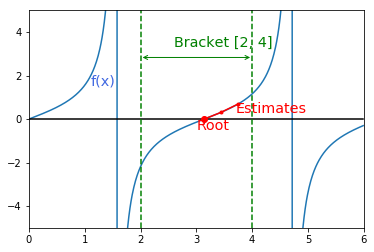

In [21]:
from matplotlib import pyplot as plt
from numpy import arange, tan, zeros
from math import pi

def intro_plot():
    xmin = 0
    xmax = 6
    x = arange(xmin, xmax, 0.01)
    plt.plot(x, tan(x), '-')
    plt.plot(x, zeros(x.size), '-', color='black')
    miny = -5
    maxy = 5
    plt.ylim(miny, maxy)
    plt.xlim(xmin, xmax)

    # Annotation
    label_size = 'x-large'
    plt.annotate("f(x)", xy=(1.1, tan(1)), fontsize=label_size, color='royalblue')

    # Bracket
    minx = 2
    maxx = 4
    bracket_color = 'green'
    plt.plot([minx, minx], [miny, maxy], '--', color=bracket_color)
    plt.plot([maxx, maxx], [miny, maxy], '--', color=bracket_color)
    ybracket = 2/3*(maxy)
    plt.annotate("Bracket [{}, {}]".format(minx, maxx), xy=((minx+maxx)/2-0.4, ybracket), color=bracket_color, fontsize=label_size)
    plt.annotate(s='', xy=(minx, ybracket-0.5), xytext=(maxx,ybracket-0.5), arrowprops=dict(arrowstyle='<->', color=bracket_color))
    
    # Root
    from math import pi
    #plt.plot([0, 6], [0, 0], '--', color='black')
    plt.plot([pi], [0], 'o', color='red')
    plt.annotate("Root", xy=(3, -0.5), color='red', fontsize=label_size)
    return plt

plt = intro_plot()
label_size = 'x-large'
# Estimates
step = 0.3
maxx = 4
x = arange(pi, maxx, step)
plt.plot(x, tan(x), '.-', color='red')
plt.annotate('Estimates', xy=(maxx-step, tan(pi+step)), color='red', fontsize=label_size)
plt.show()


## 2. Incremental Search

Main idea
* If $f(x_1)$ and $f(x_2)$ have opposite signs, then the root is in [$x_1$, $x_2$].
* $\Rightarrow$ Evaluate $f$ at interval $\Delta x$ and look for a change of sign.

### Illustration

$f(x_1)$ and $f(x_2)$ have different signs $\Rightarrow$ the root is in [$x_1$, $x_2$].

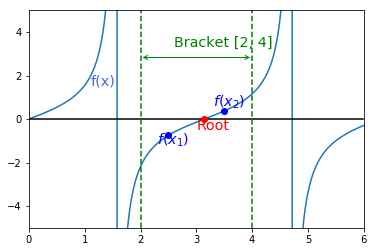

In [3]:
plt = intro_plot()
plt.plot([])
x1 = 2.5
x2 = 3.5
label_color = 'blue'
plt.plot([x1, x2], [tan(x1), tan(x2)], 'o', color=label_color)
shift = 0.4
plt.annotate(s="$f(x_1)$", xy=(x1-shift/2, tan(x1)-shift), fontsize=label_size, color=label_color)
plt.annotate(s="$f(x_2)$", xy=(x2-shift/2, tan(x2)+shift/2), fontsize=label_size, color=label_color)
plt.show()

Be careful, sign inversions might also occur when function is not continuous!

### Example

Using *incremental search* with $\Delta x=0.1$, find the zero of $f(x)=x^2-2$ in the interval [1, 2].

### Implementation

In [4]:
from numpy import sign
def root_find_incremental(f, xmin, xmax, delta_x):
    '''
    f is the function for which we will find a zero
    xmin and xmax define the bracket
    delta_x is the step used in incremental search
    Returns (a+b)/2, where the root is in [a, b] and |b-a| < delta_x
    '''
    a = xmin
    b = a + delta_x
    fa = f(a)
    fb = f(b)
    estimates = [] # we will store the successive estimates in this list, for visualization purposes
    while(b <= xmax):
        root_estimate = (a+b)/2
        estimates.append(root_estimate)
        if sign(fa) != sign(fb):
            return root_estimate, estimates
        a = b
        b += delta_x
        fa = fb
        fb = f(b)
    raise Exception("Could not find root in bracket")

### Example

In [5]:
f = tan
x, estimates = root_find_incremental(f, 2, 4, 0.01)
print(x, "({} estimates)".format(len(estimates)))

3.1449999999999756 (115 estimates)


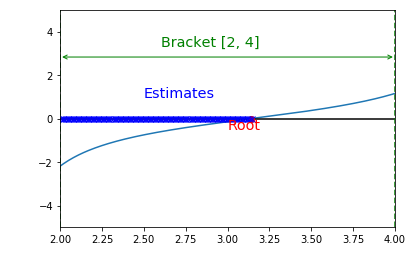

In [6]:
# Plot
plt = intro_plot()
plt.xlim(2, 4)
plt.plot(estimates, zeros(len(estimates)), 'x', color='blue')
plt.annotate("Estimates", xy=(2.5, 1), color='blue', fontsize=label_size)
plt.show()

### Issues
* Accurate estimation of the root requires a small $\Delta x$ value
* Number of evaluations of $f$ is $\frac{x_{\mathrm{max}}-x_{\mathrm{min}}}{\Delta x}$ (worst case)

## 3. Method of Bisection

The bisection method *halves* the interval until it becomes smaller than $\Delta x$.

Main idea:
* If there is a root in [$x_1$, $x_2$], then f($x_1$) and f($x_2$) have opposite signs (as in incremental search).
* Define $x_3=\frac{x_1+x_2}{2}$. If f($x_1$) and f($x_3$) have opposite signs, then the root is in [$x_1$, $x_3$]; otherwise, it's in [$x_2$, $x_3$]. 

### Illustration



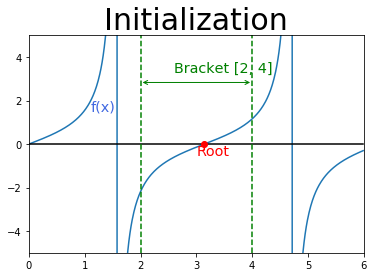

In [7]:
graph = intro_plot()
graph.title("Initialization")
graph.show()

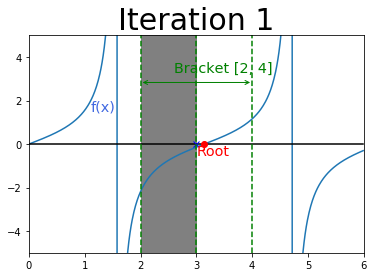

In [8]:
graph = intro_plot()
graph.title("Iteration 1")
graph.plot([3], [0], 'x', color='blue')
graph.plot([3, 3], [-5, 5], '--', color='green')
rect = graph.Rectangle([2, -5], 1, 10, color='gray')
graph.gca().add_patch(rect)
graph.show()

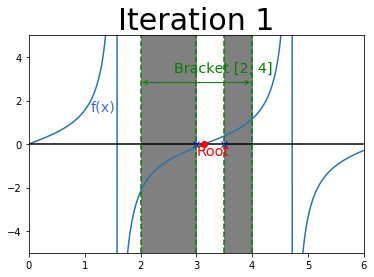

In [9]:
graph = intro_plot()
graph.title("Iteration 1")
graph.plot([3], [0], 'x', color='blue')
graph.plot([3, 3], [-5, 5], '--', color='green')
graph.plot([3.5], [0], 'x', color='blue')
graph.plot([3.5, 3.5], [-5, 5], '--', color='green')
rect = graph.Rectangle([2, -5], 1, 10, color='gray')
graph.gca().add_patch(rect)
rect = graph.Rectangle([3.5, -5], 0.5, 10, color='gray')
graph.gca().add_patch(rect)
graph.show()

### Example

Using *bisection*, find the zero of $f(x)=x^2-2$ in the interval [1, 2].

### Implementation

In [10]:
def root_find_bisection(f, xmin, xmax, delta_x):
    '''
    f is the function for which we will find a zero
    xmin and xmax define the bracket
    delta_x is the desired accuracy
    Returns (a+b)/2, where the root is in [a, b] and |b-a| <= delta_x
    '''
    
    a = xmin
    b = xmax
    fa = f(a)
    fb = f(b)
    if sign(fa) == sign(fb):
        raise Exception("Root is not bracketed") # Root is not bracketed
    estimates = [] # we will store the successive estimates in this list, for visualization purposes
    while(b-a > delta_x):
        # At this point, fa and fb always have different signs
        c = (a+b)/2
        estimates.append(c)
        fc = f(c)
        if sign(fc) == sign(fa):
            # The root must be in [c, b]
            a = c
            fa = fc
        else:
            b = c
            fb = fc
    estimates.append((a+b)/2)
    return (a+b)/2, estimates

### Example

In [11]:
f = tan
x, estimates = root_find_bisection(f, 2, 4, 0.01)
print(x, "({} estimates)".format(len(estimates)))

3.14453125 (9 estimates)


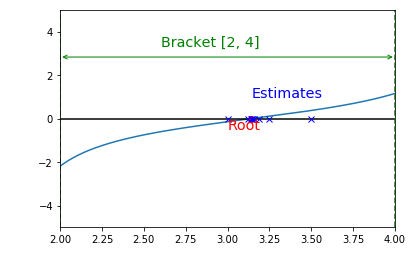

In [12]:
# Plot
plt = intro_plot()
plt.xlim(2, 4)
plt.plot(estimates, zeros(len(estimates)), 'x', color='blue')
plt.annotate("Estimates", xy=(pi, 1), color='blue', fontsize=label_size)
plt.show()

## 4. False Position Method

The False Position Method (a.k.a. *regula falsi*) uses a linear interpolation of $f$ between the two bounds of the bracket.

### Illustration

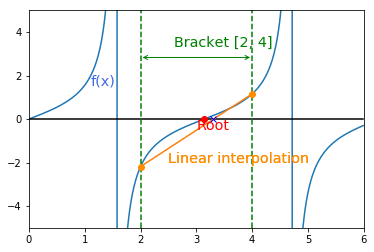

In [13]:
plt = intro_plot()
a = 2 ; b = 4
plt.plot([a, b], [tan(a), tan(b)], '-')
plt.plot([a, b], [tan(a), tan(b)], 'o', color='darkorange')
plt.annotate("Linear interpolation", xy=(2.5, -2), fontsize=label_size, color='darkorange')
x = (a*tan(b)-b*tan(a))/(tan(b)-tan(a))
plt.plot([x], [0], 'x', color='blue')
plt.annotate("Linear interpolation", xy=(2.5, -2), fontsize=label_size, color='darkorange')
plt.show()

### Formulation

Let [a, b] be the interval in which the zero has been bracketed.

Let $y = \alpha x + \beta$ be the straight line interpolating $f$ at a and b.

We have:
$$
\alpha = \frac{f(b)-f(a)}{b-a} \quad \beta = \frac{bf(a)-af(b)}{b-a}
$$

The method estimates the zero to be $c$ such that:
$$
\alpha c + \beta = 0
$$
which gives:
$$
c = \frac{af(b)-bf(a)}{f(b)-f(a)}
$$

Then, if f(a) and f(c) have the same sign (resp. f(b) and f(c) have the same sign), a (resp. b) is replaced by c and the method iterates.

### Example

Using the *false position* method, find the zero of $f(x)=x^2-2$ in the interval [1, 2].

### Implementation

In [14]:
from numpy import sign

def false_position(f, a, b, delta_x):
    '''
    f is the function for which we will find a zero
    a and b define the bracket
    delta_x is the desired accuracy
    Returns ci such that |ci-c_{i-1}| < delta_x
    '''
    fa = f(a)
    fb = f(b)
    if sign(fa) == sign(fb):
        raise Exception("Root hasn't been bracketed")
    estimates = []
    while True:
        c = (a*fb-b*fa)/(fb-fa)
        estimates.append(c)
        fc = f(c)
        if sign(fc) == sign(fa):
            a = c
            fa = fc
        else:
            b = c
            fb = fc
        if len(estimates) >=2 and abs(estimates[-1] - estimates[-2]) <= delta_x:
            break
    return c, estimates

In [15]:
from math import tan
x, estimates = false_position(tan, 2, 4, 0.01)
print(x, "({} estimates)".format(len(estimates)))

3.149071782828593 (5 estimates)


## 5. Newton-Raphson Method

This method is simple and fast, but it requires that the derivative of the function can be computed. 

This method approximates f by the straight line tangent to the curve at $x_i$:

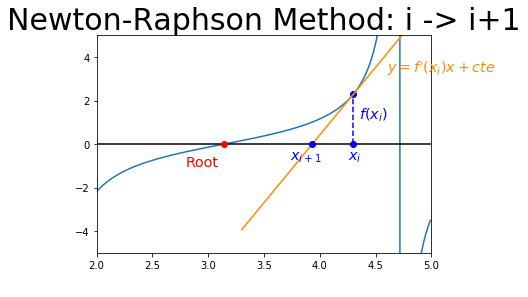

In [16]:
def diff(x): # derivative
        from math import sin, cos
        return sin(x)**2/cos(x)**2 + 1
    
def newton_plot(f, diff, xmin=2, xmax=5, ymin=-5, ymax=5, xi=4.3, root=True):
    x = arange(xmin, xmax, 0.01)
    vals = zeros(x.size)
    for i in range(x.size):
        vals[i] = f(x[i])
    plt.plot(x, vals, '-')
    plt.plot(x, zeros(x.size), '-', color='black')
    miny = ymin
    maxy = ymax
    plt.ylim(miny, maxy)
    plt.xlim(xmin, xmax)

    # Annotation
    label_size = 'x-large'
    plt.annotate("f(x)", xy=(0.5, 2), fontsize=label_size, color='royalblue')

    # Root
    if root:
        from math import pi
        #plt.plot([0, 6], [0, 0], '--', color='black')
        plt.plot([pi], [0], 'o', color='red')
        plt.annotate("Root", xy=(2.8, -1), color='red', fontsize=label_size)

    #xi
    plt.plot([xi], [0], 'o', color='blue')
    plt.plot([xi], [f(xi)], 'o', color='blue')
    plt.annotate("$x_i$", xy=(xi-.05, -.7), color='blue', fontsize=label_size)
    plt.plot([xi, xi], [0, f(xi)], '--', color='blue')
    
    # tangent line
    plt.plot([xi-1, xi, xi+1], [f(xi)-diff(xi), f(xi), f(xi)+diff(xi)], color='darkorange')
    plt.annotate("$y=f'(x_i)x+cte$", xy=(xi+0.3, tan(xi)+1), color='darkorange', fontsize=label_size)
    return plt

from matplotlib import pyplot as plt
graph = newton_plot(tan, diff)
# xi+1
xi=4.3
plt.annotate("$f(x_i)$", xy=(xi+0.05, tan(xi)/2), color='blue', fontsize=label_size)
x2 = xi-tan(xi)/diff(xi)
graph.plot([x2], [0], 'o', color='blue')
graph.annotate("$x_{i+1}$", xy=(x2-.2, -.7), color='blue', fontsize=label_size)
graph.title("Newton-Raphson Method: i -> i+1")
graph.show()

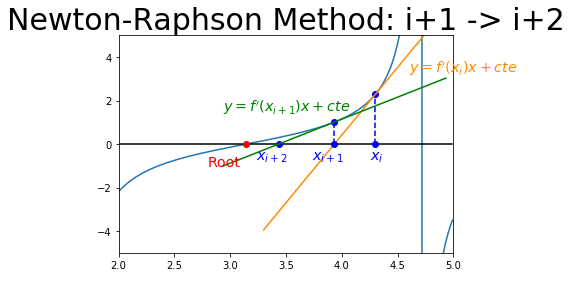

In [17]:
# xi+2
x3 = x2-tan(x2)/diff(x2)

# tangent line at xi+1
graph = newton_plot(tan, diff)
graph.plot([x2], [0], 'o', color='blue')
graph.annotate("$x_{i+1}$", xy=(x2-.2, -.7), color='blue', fontsize=label_size)
plt.plot([x2, x2], [0, tan(x2)], '--', color='blue')
graph.plot([x2], [tan(x2)], 'o', color='blue')
graph.plot([x3], [0], 'o', color='blue')
graph.annotate("$x_{i+2}$", xy=(x3-.2, -.7), color='blue', fontsize=label_size)
graph.plot([x2-1, x2, x2+1], [tan(x2)-diff(x2), tan(x2), tan(x2)+diff(x2)], color='green')
graph.annotate("$y=f'(x_{i+1})x+cte$", xy=(x2-1, tan(x2)+0.5), color='green', fontsize=label_size)
graph.title("Newton-Raphson Method: i+1 -> i+2")
graph.show()

Graphically, the slope of the tangent to $f$ at $x_i$ (orange line) is:
$$
s = \frac{f(x_i)}{x_i-x_{i+1}}
$$
And by definition of $f'$, we also have $s = f'(x_i)$.

Thus:
$$
f'(x_i) = \frac{f(x_i)}{x_i-x_{i+1}}
$$
which gives:
$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} \quad \textbf{(1)}
$$

### Example

Use the *Newton-Raphson* method to determine successive estimates of a zero of $f(x)=x^2-2$, starting with an estimate of $5$. 

### Implementation

In [18]:
def newton_raphson(f, diff, init_x, tol, max_iter=1000):
    '''
    f is the function for which a zero is seeked
    diff is the derivative of the function
    init_x is the initial estimate
    tol is the tolerance (accuracy) of the solution
    max_iter is the desired maximal number of iterations
    '''
    x = init_x
    estimates = []
    for i in range(max_iter): # we will break out of the loop when we find the root
        delta_x = -f(x)/diff(x)
        x = x + delta_x
        estimates.append(x)
        if abs(delta_x) <= tol:
            return x, estimates
    raise Exception("Unable to find a root")

### Example

In [19]:
from math import tan
def diff_tan(x):
    return 1 + tan(x)**2
x, estimates = newton_raphson(tan, diff_tan, 3, 0.01)
print(x, "({} estimates)".format(len(estimates)))

3.1415926491252555 (2 estimates)


### Other tests (failed)

##### Null derivative

In [22]:
def f1(x):
    return x**2-2

def diff1(x):
    return 2*x

newton_raphson(f1, diff1, 0, 10E-5)

ZeroDivisionError: division by zero

What happened:

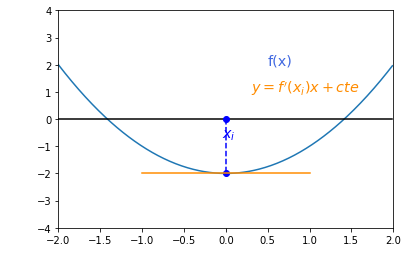

In [23]:
graph = newton_plot(f1, diff1, -2, 2, -4, 4, 0)

$\Rightarrow$ the method assumes that **$f'$ is not zero at and around the root**.

Initialization is far from the root

In [24]:
def f2(x):
    from math import exp, sin
    return exp(-0.1*x)*sin(x*3)+0.5

def diff2(x):
    from math import exp, sin, cos
    return -0.1*exp(-0.1*x)*sin(x*3)+exp(-0.1*x)*3*cos(3*x)

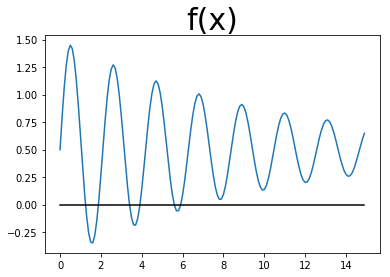

In [25]:
from numpy import arange
x = arange(0, 15, 0.1)

from matplotlib import pyplot as plt
y = zeros(x.size)
for i in range(x.size):
    y[i] = f2(x[i])
plt.plot(x, y)
plt.plot(x, zeros(x.size), color='black')
plt.title("f(x)")
plt.show()

In [26]:
newton_raphson(f2, diff2, 12, 10E-5)

Exception: Unable to find a root

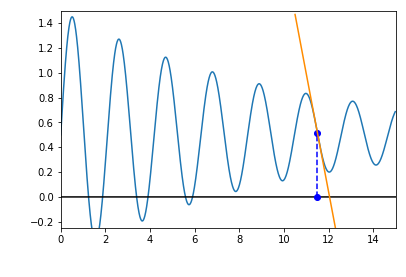

In [27]:
graph = newton_plot(f2, diff2, 0, 15, -0.25, 1.5, 11.5, False)
graph.show()

$\Rightarrow$ initialization has to be sufficiently close to the root.

### A safer implementation

The following implementation falls back on bisection when:
* $f'(x)=0$
* The root estimate goes outside of the bracket

In [28]:
def newton_raphson_safe(f, diff, tol, a, b, max_iter=1000):
    fa = f(a)
    fb = f(b)
    if sign(fa) == sign(fb):
        raise Exception("Root is not bracketed")
    x = (a+b)/2 # initial guess for Newton-Raphson
    for i in range(max_iter):
        # Try a Newton-Raphson iteration
        try:
            diff_x = diff(x)
            if diff_x == 0:
                raise NewtonRaphsonError("Derivative is 0")
            delta_x = -f(x)/diff(x)
            x += delta_x
            if x > b or x < a:
                raise NewtonRaphsonError("Estimate is going out of bound")
        except NewtonRaphsonError as e:
            # Fall back on bisection
            delta_x = (b-a)/2
            x = a + delta_x

        # Check for convergence
        if abs(delta_x) <= tol:
            return x
    
        # Tighten the bracket
        fx = f(x)
        if sign(fa) == sign(fx):
            a = x
            fa = fx
        else:
            b = x
            fb = fx
    raise NewtonRaphsonError("Cannot find root")
            
class NewtonRaphsonError(Exception):
    pass

In [29]:
x = newton_raphson_safe(f2, diff2, 10E-5, 0, 1.8)
print(x)

1.24793095061865


In [30]:
x = newton_raphson_safe(f1, diff1, 10E-5, -1, 2)
print(x)

1.414213562962298


## 6. Systems of Equations

We now consider a system of $n$ non-linnear equations written as:
$$
\textbf{f}(\textbf{x})=\textbf{0}
$$

where $\textbf{f}$ is a vector of functions of $n$ variables:
$$
f_1(x_1, x_2, \ldots, x_n) = 0 \\
f_2(x_1, x_2, \ldots, x_n) = 0 \\
\ldots\\
f_n(x_1, x_2, \ldots, x_n) = 0 \\
$$


* There is no reliable method for bracketting the solution vector $\textbf{x}$. 
* The simplest and most effective resolution method is the Newton-Raphson one.
* The other methods (incremental, bisection, false position) don't generalize well to systems of equations.

### [Newton](https://en.wikipedia.org/wiki/Isaac_Newton)-[Raphson](https://en.wikipedia.org/wiki/Joseph_Raphson) method

#### Formulation

A linear (aka first-order) approximation of $\textbf{f}$ in the neighborhood of $\textbf{x}$ gives:
$$
\textbf{f}(\textbf{x}+\Delta \textbf{x}) = \textbf{f}(\textbf{x}) + \textbf{J}(\textbf{x})\Delta \textbf{x} \quad \textbf{(2)}
$$

where $\textbf{J}(\textbf{x})$ is the *[Jacobian](https://en.wikipedia.org/wiki/Carl_Gustav_Jacob_Jacobi)* matrix of $\textbf{f}$ at $\textbf{x}$.

The Jacobian matrix is an $n \times n$ matrix $\textbf{J}$ defined as follows:
$$
J_{ij} = \frac{\partial f_i}{\partial x_j}
$$
or:
$$
\textbf{J} = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \ldots & \frac{\partial f_1}{\partial x_n}\\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \ldots & \frac{\partial f_2}{\partial x_n}\\
\ldots\\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \ldots & \frac{\partial f_n}{\partial x_n}\\
\end{bmatrix}
$$

In scalar form, equation $\textbf{(2)}$ is written as follows:
$$
f_i(\textbf{x}+\Delta \textbf{x}) = f_i(\textbf{x}) + \sum_{j=1}^n \frac{\partial f_i}{\partial x_j} \Delta x_j
$$

Setting $\textbf{f}(\textbf{x}+\Delta \textbf{x})$ to 0 (since it is the new approximation of the solution), we obtain:
$$
\textbf{J}(\textbf{x})\Delta \textbf{x} = -\textbf{f}(\textbf{x}) \quad \textbf{(2)}
$$
Note the similarity with equation $\textbf{(1)}$ above (Newton-Raphson iteration for a single equation).

#### Implementation

The algorithm is written as follows:
1. Estimate the solution vector $\textbf{x}$
2. Do until $||\Delta \textbf{x} || < \epsilon$:
   * Compute $\textbf{J}(\textbf{x})$ using Equation $\textbf{(3)}$ below
   * Solve $\textbf{J}(\textbf{x})\Delta \textbf{x} = -\textbf{f}(\textbf{x})$ in $\Delta\textbf{x}$
   * Let $\textbf{x} \leftarrow \textbf{x} + \Delta \textbf{x}$


Partial derivatives of $\textbf{f}$ at $\textbf{x}$ are computed as follows:
$$
\frac{\partial f_i}{\partial x_j}(\textbf{x}) \approx \frac{f_i(\textbf{x}+h\textbf{e}_j)-f_i(\textbf{x})}{h} \quad \textbf{(3)}
$$
where $h$ is a small increment of $x_j$ and $e_j$ is a unit vector in direction $j$:
$$\textbf{e}_j=
\begin{bmatrix}
0 \\
0 \\
\ldots\\
1\\
\ldots \\
0 \\
0
\end{bmatrix}
$$

In [31]:
from numpy import zeros

def jacobian(f, x):
    '''
    Returns the Jacobian matrix of f taken in x J(x)
    '''
    n = len(x)
    jac = zeros((n, n))
    h = 10E-4
    fx = f(x)
    # go through the columns of J
    for j in range(n):
        # compute x + h ej
        old_xj = x[j]
        x[j] += h
        # update the Jacobian matrix (eq 3)
        # Now x is x + h*ej
        jac[:, j] = (f(x)-fx) / h 
        # restore x[j]
        x[j] = old_xj
    return jac

In [32]:
from numpy.linalg import solve
from numpy import sqrt

def newton_raphson_system(f, init_x, epsilon=10E-4, max_iterations=100):
    '''
    Return a solution of f(x)=0 by Newton-Raphson method.
    init_x is the initial guess of the solution
    '''
    x = init_x
    for i in range(max_iterations):
        J = jacobian(f, x)
        delta_x = solve(J, -f(x)) # we could also use our functions from Chapter 2!
        x = x + delta_x
        if sqrt(sum(delta_x**2)) <= epsilon:
            print("Converged in {} iterations".format(i))
            return x
    raise Exception("Could not find root!")

### Example

In [33]:
from numpy import array

def f(x):
    return array([x[0]**2 + x[1]**2 -3, x[0]*x[1]-1])

solution = newton_raphson_system(f, [0.5, 1.5])
print(solution)

Converged in 2 iterations
[0.61803398 1.61803401]


### Example (4.9 in the textbook):

In [34]:
# Let's do it!

from numpy import array
from math import sin, log

def f(xvec):
    x = xvec[0]
    y = xvec[1]
    z = xvec[2]
    return array([
        sin(x) + y**2 + log(z) - 7,
        3*x + 2**y - z**3 + 1,
        x + y + z - 5
    ])

In [35]:
x = array([1,1,1.0])
solution = newton_raphson_system(f, x)
print(solution)

Converged in 4 iterations
[0.59905376 2.39593141 2.00501484]


## 7. Zeroes of polynomials

### Introduction

A polynomial of degree $n$ has the form:
$$
P_n(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n
$$

It has *exactly* $n$ zeroes, some of which may be complex.

We assume that $a_i \in \mathbb{R}$, but the same methods work when $a_i \in \mathbb{C}$.

### Evaluation of polynomials

The following algorithm computes $P(x)$ "from left to right".

It is straightforward, but it leads to many unnecessary operations:

In [36]:
def eval_p_naive(a, x):
    '''
    This function returns P(x)
    The coefficients of the polynomial are in array a
    '''
    result = a[0]
    n = len(a)
    for i in range(1, n):
        result += a[i]*x**i
    return result

In [37]:
eval_p_naive(array([0, 1, 1]), 4)

20

Total number of multiplications is $\sum_{i=1}^{n-1}\ln(i)=\ln((n-1)!)$

Rewriting the polynomial as follows leads to a better algorithm:

$$
P_n(x) = a_0 + x \left( a_1 + x \left( a_2 + x \left (\ldots + xa_n \right) \right) \right)
$$

which results in the following sequence:
$$
P_0(x) = a_n\\
P_i(x) = a_{n-i} + x P_{i-1}(x) \quad 1 \leq i \leq n
$$

In [38]:
def eval_p(a, x):
    '''
    Returns P(x) where the coefficients of P are in a
    '''
    n = len(a)
    p = a[n-1]
    for i in range(2, n+1):
        p = a[n-i] + x*p
    return p
    

In [39]:
eval_p([0, 1, 1], 4)

20

Total number of multiplications is n-1.

### Evaluation of derivatives

The relation between $P_n$ and $P_{n-1}$ can also be used to compute derivatives of $P$:

$$
P_0'(x) = 0 \\
P_i'(x) = P_{i-1}(x) + xP'_{i-1}(x) \quad 1 \leq i \leq n
$$

and:

$$
P''_0(x) = 0 \\
P_i''(x) = 2P'_{i-1}(x) + xP''_{i-1}(x) \quad 1 \leq i \leq n
$$

In [40]:
def eval_p_dp_ddp(a, x):
    '''
    Returns P(x), P'(x) and P''(x) where the coefficients of P are in a
    '''
    n = len(a)
    p = a[n-1]
    dp = 0
    ddp = 0
    for i in range(2, n+1):
        # careful with the order!
        ddp = 2*dp + x*ddp
        dp = p + x*dp
        p = a[n-i] + x*p
    return p, dp, ddp

In [41]:
eval_p_dp_ddp([0, 1, 1], 4)

(20, 9, 2)

In [42]:
eval_p([1, 0, 1], 3)

10

### Deflation of polynomials

After a root $r$ of $P_n$ has been found, $P_n$ can be factorized as follows:
$$
P_n(x) = (x-r)P_{n-1}(x)
$$

This procedure is called *deflation*. This is useful because:
* The remaining zeroes of $P_n$ are the zeroes of $P_{n-1}$.
* $P_{n-1}$ is of degree $n-1$.

#### Determining $P_{n-1}$

$P_{n-1}$ can be written as follows:
$$
P_{n-1}(x) = b_0 + b_1x + b_2x^2 + \ldots + b_{n-1}x^{n-1} 
$$

Therefore:
$$
P_n(x) = (x-r)P_{n-1}(x) = b_0(x-r) + b_1x(x-r) + b_2x^2(x-r) + \ldots + b_{n-1}x^{n-1}(x-r)
$$



By identification with the coefficients of $P_n$:
$$
b_{n-1} = a_n \\
b_{n-2} = a_{n-1} + rb_{n-1} \\
\ldots \\
b_0 = a_1 + rb_1
$$

This leads to [Horner](https://en.wikipedia.org/wiki/William_George_Horner)'s deflation algorithm:

In [43]:
from numpy import zeros
def deflate(a, r):
    '''
    Returns an array with the coefficients of P_{n-1} where P_n(x) = (x-r)P_{n-1}(x)
    The coefficients of Pn are in a
    r is a root of Pn
    '''
    n = len(a) - 1 # n is the degree of Pn. There are n+1 coefficients in Pn
    assert(n>=1)
    b = zeros(n, dtype=complex)
    b[n-1] = a[n]
    for i in range(n-2, -1, -1): # decreasing index
        b[i] = a[i+1] + r*b[i+1]
    return b

#### Example (4.10 in textbook)

In [44]:
from numpy import array
deflate(array([12, -2, -48, -10, 3.0]), 6)

array([-2.+0.j,  0.+0.j,  8.+0.j,  3.+0.j])

### Laguerre's method for polynomial root-finding

Laguerre's method is an iterative method to find polynomial roots.

#### Principle

*It works in the general case*, but to explain the formula here, we consider a polynomial in the following form:
$$
P_n(x)=(x-r)(x-q)^{n-1} \quad \textbf{(a)}
$$

Our problem is now to determine $r$ given the polynomial in Equation $\textbf{(a)}$ in the form:
$$
P_n(x) = a_0 + a_1x + a_2x^2 + \ldots + a_nx^n
$$
Note that q is also unknown.

We will express $r$ as a function of $P_n$, $P'_n$ and $P''_n$.

By differentiation of $\textbf{(a)}$, we get:

$$
P'_n(x) = (x-q)^{n-1} + (n-1)(x-r)(x-q)^{n-2} \\
        = P_n(x)\left(\frac{1}{x-r} + \frac{n-1}{x-q} \right)
$$

Which gives:  
$$
\frac{P'_n(x)}{P_n(x)} = \frac{1}{x-r} + \frac{n-1}{x-q} \quad \textbf{(b)}
$$

Another differentiation gives:
$$
\frac{P''_n(x)P_n(x)-P'_n(x)P'_n(x)}{P_n^2(x)}=\frac{-1}{(x-r)^2}+\frac{(1-n)}{(x-q)^2}
$$

i.e.:
    
$$
\frac{P_n''(x)}{P_n(x)}-\left( \frac{P_n'(x)}{P_n(x)}\right)^2 = - \frac{1}{(x-r)^2} - \frac{n-1}{(x-q)^2} \quad \textbf{(c)}
$$

Let's set the following notations:
$$
G(x) = \frac{P_n'(x)}{P_n(x)} \quad \textbf{(d)}\\
\mathrm{and} \\
H(x) = G(x)^2 - \frac{P_n''(x)}{P_n(x)} \quad \textbf{(e)}
$$

We have:
$$
G(x) = \frac{1}{x-r} + \frac{n-1}{x-q} \quad \mathrm{from\ Eq. \textbf{(b)}}\\
H(x) = \frac{1}{(x-r)^2} + \frac{n-1}{(x-q)^2} \quad \mathrm{from\ Eq. \textbf{(c)}}
$$

We can solve these equations in $r$ and $q$ using the following change of variables:
$$
R(x) = \frac{1}{x-r} \\
Q(x) = \frac{1}{x-q}
$$
We obtain:
$$
x-r=\frac{n}{G(x) \pm \sqrt{(n-1)\left(nH(x)-G(x)^2\right)}} \quad \textbf{(f)}
$$

#### Algorithm

The resulting root-finding algorithm is as follows:

Repeat until $|P(x)|\leq \epsilon$ or $|x-r| \leq \epsilon$:
   * Evaluate $P(x)$, $P'(x)$ and $P''(x)$
   * Evaluate $H(x)$ and $G(x)$ from equations $\textbf{(d)}$ and $\textbf{(e)}$ 
   * Determine $\Delta x = x-r$ from equation $\textbf{(f)}$ by choosing *the solution with the largest magnitude in the denominator*
   * Replace $x$ by $r$

#### Implementation

In [49]:
import cmath 
from random import random
def laguerre(a, x=random(), epsilon=1E-12, max_iters=100):
    '''
    Returns one root of the polynomial in a using Laguerre's method
    '''
    n = len(a) - 1
    for i in range(max_iters):
        p, dp, ddp = eval_p_dp_ddp(a, x)
        if abs(p) < epsilon:
            print("Converged in {} iterations".format(i))
            return x
        g = dp/p # eq d
        h = g*g - ddp/p # eq e
        sqr = cmath.sqrt((n-1)*(n*h-g*g)) # note import from cmath so that sqrt is defined on R
        if abs(g+sqr) > abs(g-sqr):
            delta = n / (g+sqr) # eq f
        else:
            delta = n / (g-sqr) # eq f
        x = x - delta # delta = x- r -> x <- r
        if abs(delta) < epsilon:
            print("Converged in {} iterations".format(i))
            return x
    raise Exception("Did not find a root")

In [50]:
from numpy import array
a = array([-1, 1, 1], dtype=complex)
laguerre(a)

Converged in 1 iterations


(0.6180339887498949+0j)

#### Finding all the roots of a polynomial

Laguerre's method finds *one* root of the polynomial. We can use polynomial deflation to find *all* the roots of a polynomial:

In [51]:
def roots(a):
    '''
    Returns all the roots of the polynomials with coefficients in a
    '''
    n = len(a) - 1
    roots = zeros(n, dtype=complex) # there are exactly n roots
    for i in range(n):
        r = laguerre(a)
        a = deflate(a, r)
        roots[i] = r
    return roots
        

#### Example (4.12 in textbook)

In [53]:
# Let's do it!

from numpy import array
a = array([-250, 155, -9, -5, 1], dtype=float)

In [54]:
roots(a)

Converged in 3 iterations
Converged in 5 iterations
Converged in 1 iterations
Converged in 1 iterations


array([ 2.+0.0000000e+00j,  4.-3.0000000e+00j,  4.+3.0000000e+00j,
       -5.+8.8817842e-16j])